15/10/2020

# 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing Dataset

In [2]:
# training data
train_dts = pd.read_csv('../input/titanic/train.csv')
train_dts.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# test data
test_dts = pd.read_csv('../input/titanic/test.csv')
test_dts.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **2.1 Overview** 
* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

# 3. Feature Engineering

Calculating Survival rate of Male and Female on training set

In [4]:
female = train_dts.loc[train_dts.Sex=='female']['Survived']
print('% of Female survived : {:.3f}'.format((sum(female)/len(female))*100))

male = train_dts.loc[train_dts.Sex=='male']['Survived']
print('% of Male survived : {:.3f}'.format((sum(male)/len(male))*100))

% of Female survived : 74.204
% of Male survived : 18.891


can be seen clearly that female has much larger probablity of surviving then male

In [5]:
print('Shape of Training Set : {}'.format(train_dts.shape))
print('Number of training data points : {}\n'.format(len(train_dts)))
print('Shape of Test Set : {}'.format(test_dts.shape))
print('Number of test data points : {}\n'.format(len(test_dts)))
print('Columns : {}'.format(train_dts.columns))
train_dts.info()

Shape of Training Set : (891, 12)
Number of training data points : 891

Shape of Test Set : (418, 11)
Number of test data points : 418

Columns : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: 

In [6]:
test_dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_dts.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_dts.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 3.1 Heatmap

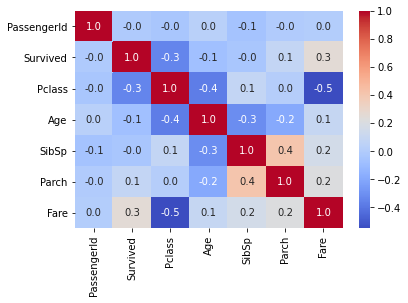

In [9]:
g = sns.heatmap(train_dts.corr(),annot=True, fmt = ".1f", cmap = "coolwarm")

### 3.2 Age Histogram Plot

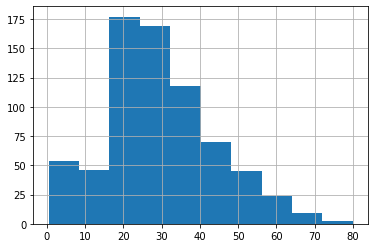

In [10]:
age_hist = train_dts.Age.hist()

from the above histogram it can be observed that most of the passengers were from the age group of 20 - 40

In [11]:
train_dts.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

the Passenger Class status also has an influence on the survival chances

In [12]:
pd.crosstab(index=train_dts['Sex'], columns=train_dts['Pclass'], values=train_dts.Survived, aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


also the `gender` in the classes also has an influence as it can be seen that female has **96%** chances and males has **36%** in class 1 only and can seen decreasing with `lower class`

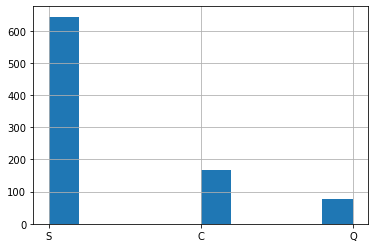

In [13]:
embarked_hist = train_dts.Embarked.hist()

### **3.3 Missing Values**
As seen from below, some columns have missing values. `display_missing` function shows the count of missing values in every column in both training and test set by using `info()` function in non null count

* Training set and test set both have missing values in `Age`, `Cabin` and `Embarked` columns. and in `fare` test set 

Missing values in `Age`, `Embarked` and `Fare` can be filled with descriptive statistical measures but that wouldn't work for `Cabin`.

above histogram shows that most of the passengers belong to the `S` (Southampton) in `Embarked`, let's fill tha `nan` values by **S** in training set and test set. And the `nan values` in `age` can be filled by takaing `mean` of all age in test and train sets

In [14]:
#Fill nan values in Embarked with 'S' as it is most frequent value
train_dts['Embarked'] = train_dts['Embarked'].fillna('S')
train_dts['Age'] = train_dts['Age'].fillna(train_dts['Age'].mean())
train_dts['Age'].isnull().sum() 

0

the `nan` values in `fare` column can be filled taking median in test set

In [15]:
test_dts['Fare'] = test_dts['Fare'].fillna(test_dts['Fare'].median())
test_dts['Age'] = test_dts['Age'].fillna(test_dts['Age'].mean())

creating titles from names of passengers

In [16]:
title = [i.split(",")[1].split(".")[0].strip() for i in train_dts['Name']]
train_dts['Title'] = pd.Series(title)

title_ = [i.split(",")[1].split(".")[0].strip() for i in test_dts['Name']]
test_dts['Title'] = pd.Series(title_)

train_dts.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Don               1
Mme               1
Ms                1
Jonkheer          1
Capt              1
Lady              1
Sir               1
the Countess      1
Name: Title, dtype: int64

`'Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don',  'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mme', 'Ms', 'Mlle'` these titles appers less in the dataset as their count is 1 or 2 lets remove them by a single lable `rare`

In [17]:
train_dts["Title"] = train_dts["Title"].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don',  'Dr',
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mme', 'Ms', 'Mlle'],
                                                'Rare'
                                               )
test_dts["Title"] = test_dts["Title"].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                               'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mme', 'Ms', 'Mlle'],
                                              'Rare'
                                             )

<function matplotlib.pyplot.show(*args, **kw)>

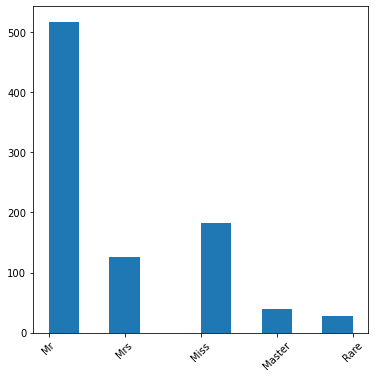

In [18]:
plt.figure(figsize=(6,6))
plt.hist(train_dts.Title)
plt.xticks(rotation=45)
plt.show

In [19]:
mr = train_dts.loc[train_dts['Title']=='Mr'].Survived
miss = train_dts.loc[train_dts['Title']=='Miss'].Survived
mrs = train_dts.loc[train_dts['Title']=='Mrs'].Survived
master = train_dts.loc[train_dts['Title']=='Master'].Survived
rare = train_dts.loc[train_dts['Title']=='Rare'].Survived

print("probablity of Surviving if Mr : {:.2f}".format(sum(mr)/len(mr)))
print("probablity of Surviving if Mrs : {:.2f}".format(sum(mrs)/len(mrs)))
print("probablity of Surviving if Miss : {:.2f}".format(sum(miss)/len(miss)))
print("probablity of Surviving if Master : {:.2f}".format(sum(master)/len(master)))
print("probablity of Surviving if Rare : {:.2f}".format(sum(rare)/len(rare)))

probablity of Surviving if Mr : 0.16
probablity of Surviving if Mrs : 0.79
probablity of Surviving if Miss : 0.70
probablity of Surviving if Master : 0.57
probablity of Surviving if Rare : 0.44


the surviving probablities of titles `Miss`, `Mrs` and `Master` are higher

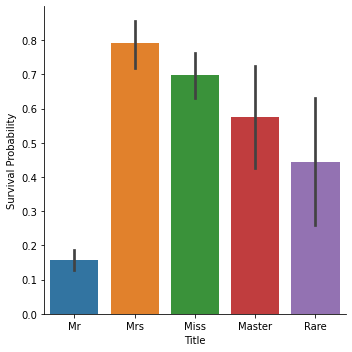

In [20]:
g = sns.catplot(x="Title", y="Survived", data=train_dts, kind='bar').set_ylabels("Survival Probability")

it can be assumend that the larger families size has difficulties to get on board as they to find all the mambers of families, lets create a new column of Family size

In [21]:
train_dts['FamilySize'] = train_dts['SibSp'] + train_dts['Parch'] + 1
test_dts['FamilySize'] = test_dts['SibSp'] + test_dts['Parch'] + 1

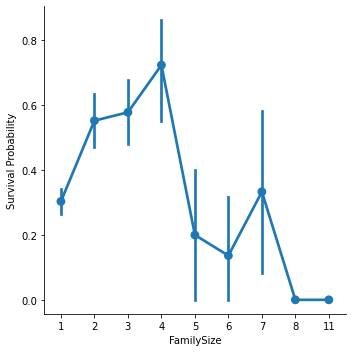

In [22]:
g = sns.catplot(data=train_dts, x='FamilySize', y='Survived', kind='point').set_ylabels("Survival Probability")

above graph verifies that persons with family size of 1 to 4 had more surviving prob and larger families with 8 and 11 has nearly 0 probablity

* Sigleton : a boolean variable that describes families of size = 1
* SmallFamily : a boolean variable that describes families of 2 <= size <= 4
* LargeFamily : a boolean variable that describes families of 5 < size

In [23]:
# on training set
train_dts['Singleton'] = train_dts['FamilySize'].map(lambda s: 1 if s == 1 else 0)
train_dts['SmallFamily'] = train_dts['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
train_dts['LargeFamily'] = train_dts['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

# on test set
test_dts['Singleton'] = test_dts['FamilySize'].map(lambda s: 1 if s == 1 else 0)
test_dts['SmallFamily'] = test_dts['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
test_dts['LargeFamily'] = test_dts['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

it can be assumed that passengers with missing values in cabin not had a cabin aat all so we fill it by 0 and passengers with cabin can be filled by 1

In [24]:
train_dts.loc[train_dts.Cabin.isnull(), 'Cabin'] = 0
train_dts.loc[train_dts.Cabin != 0, 'Cabin'] = 1

test_dts.loc[test_dts.Cabin.isnull(), 'Cabin'] = 0
test_dts.loc[test_dts.Cabin != 0, 'Cabin'] = 1

train_dts['Cabin'] = pd.to_numeric(train_dts['Cabin'])
test_dts['Cabin'] = pd.to_numeric(test_dts['Cabin'])

In [25]:
train_dts.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

ticket has a lot of duplicate values with mixed number and Alphabets lets now filter the ticket feature. 
We will clean ticket by getting prefix of the ticket number and for tickets with `digits only` will be replaced b `'X'`

In [26]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = ticket[0]
    if ticket.isdigit():
        return 'X'
    else:
        return ticket[0]
    
train_dts['Ticket'] = train_dts['Ticket'].map(cleanTicket)
test_dts['Ticket'] = test_dts['Ticket'].map(cleanTicket)

In [27]:
train_dts.Ticket.unique()

array(['A', 'P', 'S', 'X', 'C', 'W', 'F', 'L'], dtype=object)

now we are remaning with just 8 unique values 

In [28]:
train_dts.min()

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                           A
Fare                             0
Cabin                            0
Embarked                         C
Title                       Master
FamilySize                       1
Singleton                        0
SmallFamily                      0
LargeFamily                      0
dtype: object

In [29]:
train_dts.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                                   X
Fare                               512.329
Cabin                                    1
Embarked                                 S
Title                                 Rare
FamilySize                              11
Singleton                                1
SmallFamily                              1
LargeFamily                              1
dtype: object

# 4. Creating train and test set and label encoding

In [30]:
X_train = pd.DataFrame.copy(train_dts)
X_test = pd.DataFrame.copy(test_dts)

# label encoding
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked', 'Title', "Pclass", 'Ticket'])
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked', 'Title', "Pclass", 'Ticket'])
X_train.shape

(891, 33)

now we having 33 features

In [31]:
# droping columns
X_train.drop(labels=['Name', 'PassengerId', 'Survived'], axis=1, inplace=True)
X_test.drop(labels=['Name', 'PassengerId'], axis=1, inplace=True)

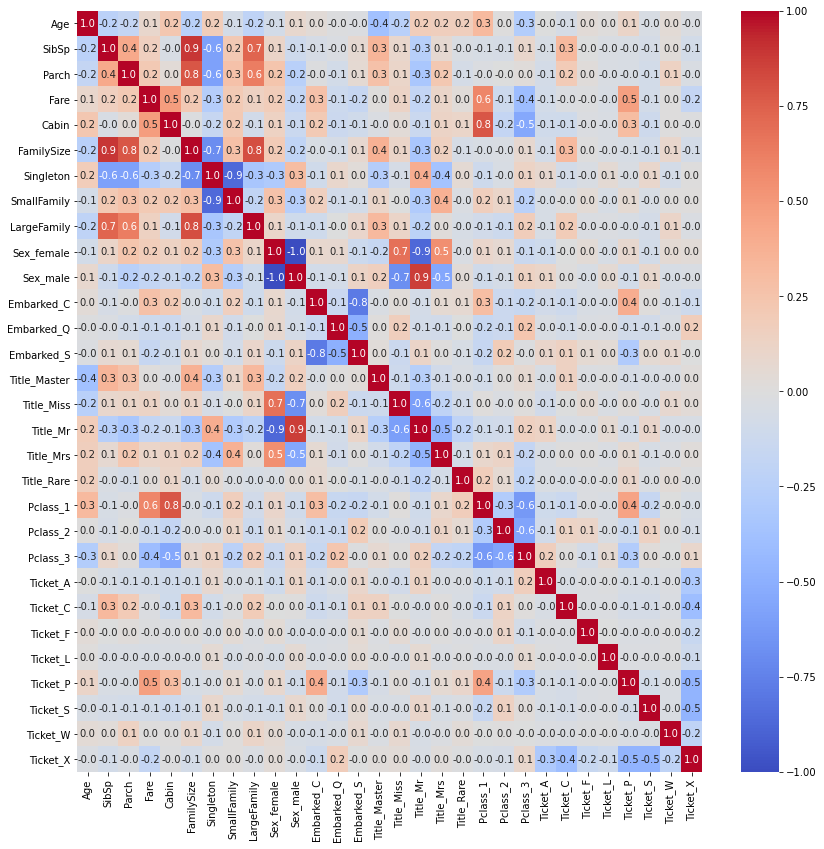

In [32]:
plt.figure(figsize = (14,14))
g = sns.heatmap(X_train.corr(),annot=True, fmt = ".1f", cmap = "coolwarm")

In [33]:
y_train = train_dts.Survived

In [34]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           891 non-null    float64
 1   SibSp         891 non-null    int64  
 2   Parch         891 non-null    int64  
 3   Fare          891 non-null    float64
 4   Cabin         891 non-null    int64  
 5   FamilySize    891 non-null    int64  
 6   Singleton     891 non-null    int64  
 7   SmallFamily   891 non-null    int64  
 8   LargeFamily   891 non-null    int64  
 9   Sex_female    891 non-null    uint8  
 10  Sex_male      891 non-null    uint8  
 11  Embarked_C    891 non-null    uint8  
 12  Embarked_Q    891 non-null    uint8  
 13  Embarked_S    891 non-null    uint8  
 14  Title_Master  891 non-null    uint8  
 15  Title_Miss    891 non-null    uint8  
 16  Title_Mr      891 non-null    uint8  
 17  Title_Mrs     891 non-null    uint8  
 18  Title_Rare    891 non-null    

,Age,SibSp,Parch,Fare,Cabin,FamilySize,Singleton,SmallFamily,LargeFamily,Sex_female,...,Pclass_2,Pclass_3,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_P,Ticket_S,Ticket_W,Ticket_X
0,22.0,1,0,7.2500,0,2,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
1,38.0,1,0,71.2833,1,2,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,26.0,0,0,7.9250,0,1,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,35.0,1,0,53.1000,1,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [35]:
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           418 non-null    float64
 1   SibSp         418 non-null    int64  
 2   Parch         418 non-null    int64  
 3   Fare          418 non-null    float64
 4   Cabin         418 non-null    int64  
 5   FamilySize    418 non-null    int64  
 6   Singleton     418 non-null    int64  
 7   SmallFamily   418 non-null    int64  
 8   LargeFamily   418 non-null    int64  
 9   Sex_female    418 non-null    uint8  
 10  Sex_male      418 non-null    uint8  
 11  Embarked_C    418 non-null    uint8  
 12  Embarked_Q    418 non-null    uint8  
 13  Embarked_S    418 non-null    uint8  
 14  Title_Master  418 non-null    uint8  
 15  Title_Miss    418 non-null    uint8  
 16  Title_Mr      418 non-null    uint8  
 17  Title_Mrs     418 non-null    uint8  
 18  Title_Rare    418 non-null    

,Age,SibSp,Parch,Fare,Cabin,FamilySize,Singleton,SmallFamily,LargeFamily,Sex_female,...,Pclass_2,Pclass_3,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_P,Ticket_S,Ticket_W,Ticket_X
0,34.5,0,0,7.8292,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,47.0,1,0,7.0000,0,2,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
2,62.0,0,0,9.6875,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,27.0,0,0,8.6625,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,22.0,1,1,12.2875,0,3,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1


after the final processing of features we are remaning with 30 features

# 5. XGBoost Model

In [36]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators= 2000,
                        max_depth= 4,
                        min_child_weight= 2,
                        gamma=0.9,                    
                        subsample=0.8,
                        colsample_bytree=0.8,
                        objective= 'binary:logistic',
                        nthread= -1,
                        scale_pos_weight=1
                       )

xgb_clf.fit(X_train, y_train)

# testing on train set
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(xgb_clf.predict(X_train), y_train))
print('Accuracy of training')
print(accuracy_score(xgb_clf.predict(X_train), y_train))

[[540  19]
 [  9 323]]
Accuracy of training
0.9685746352413019


In [37]:
pred = pd.Series(xgb_clf.predict(X_test), name='Survived')
results = pd.concat([test_dts['PassengerId'], pred], axis=1)
results.to_csv("submission.csv", index=False)
results.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


if you like my work or it helped, an upvote will help me keep me motivated..